In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

Selecting as resources just Omnipath

In [2]:
omnipath = op.interactions.OmniPath().get()

First set the folder for input and output

In [3]:
data_folder = "../../../data/"

figures_folder = "../../Figures/Group3/"

sif_output = "../../sif_files/Group3/"

Loading the data from Antoine

In [4]:
data = pd.read_csv(data_folder + "Northcott_Lin_genes.csv")

In [5]:
group3_list = data["G3"].dropna()
group3_list = group3_list.to_list()

Selecting just Group 3 group

In [6]:
group3_list

['MYC',
 'SMARCA4',
 'GFI1B',
 'ATM',
 'PTEN',
 'KBTBD4',
 'CRX',
 'HLX',
 'IRX6',
 'LHX9',
 'NKX3-2']

# Creating a Network starting from All Omnipath interactions

In [7]:
group3_net = Network(group3_list, resources = omnipath)

Error: node KBTBD4 is not present in the resources database
Error: node HLX is not present in the resources database
Error: node IRX6 is not present in the resources database
Error: node LHX9 is not present in the resources database


Adding the node that were not found manually: GBRA5 --> GABRA5

In [8]:
group3_net.nodes

,Genesymbol,Uniprot,Type
0,MYC,P01106,NaN
1,SMARCA4,P51532,NaN
2,GFI1B,Q5VTD9,NaN
3,ATM,Q13315,NaN
4,PTEN,P60484,NaN
5,CRX,O43186,NaN
6,NKX3-2,P78367,NaN


In [9]:
group3_net.complete_connection(maxlen=4, algorithm="dfs", only_signed=True, connect_with_bias=False, consensus=True)

In [10]:
group3_net.nodes

,Genesymbol,Uniprot,Type
0,MYC,P01106,NaN
1,SMARCA4,P51532,NaN
2,GFI1B,Q5VTD9,NaN
3,ATM,Q13315,NaN
4,PTEN,P60484,NaN
5,CRX,O43186,NaN
6,NKX3-2,P78367,NaN
7,GADD45A,P24522,NaN
8,MAPK14,Q16539,NaN
9,SMAD2,Q15796,NaN


In [11]:
group3_net.edges

,source,target,Type,Effect,References
0,P51532,P24522,None,stimulation,SPIKE:18414052;SPIKE_LC:18414052; SPIKE:184140...
1,P24522,Q16539,None,bimodal,HPRD:12748288;SIGNOR:15735649;SIGNOR:20626350;...
2,Q16539,P01106,None,stimulation,KEA:17570479; KEA:17570479
3,P01106,Q15796,None,stimulation,CancerCellMap:11804592;HPRD:11804592;Lit-BM-17...
4,Q15796,P16220,None,stimulation,SIGNOR:9689110;SignaLink3:23331499;SignaLink3:...
...,...,...,...,...,...
90,P49841,P03372,None,stimulation,KEA:10428798;KEA:10949034;KEA:12093745;KEA:121...
91,Q13535,P53350,None,inhibition,SPIKE:12147700;SPIKE_LC:12147700
92,Q96RU2,Q969H0,None,inhibition,SPIKE:20399964;SPIKE_LC:20399964
93,Q13535,P08047,None,stimulation,SPIKE:18619531;SPIKE_LC:18619531


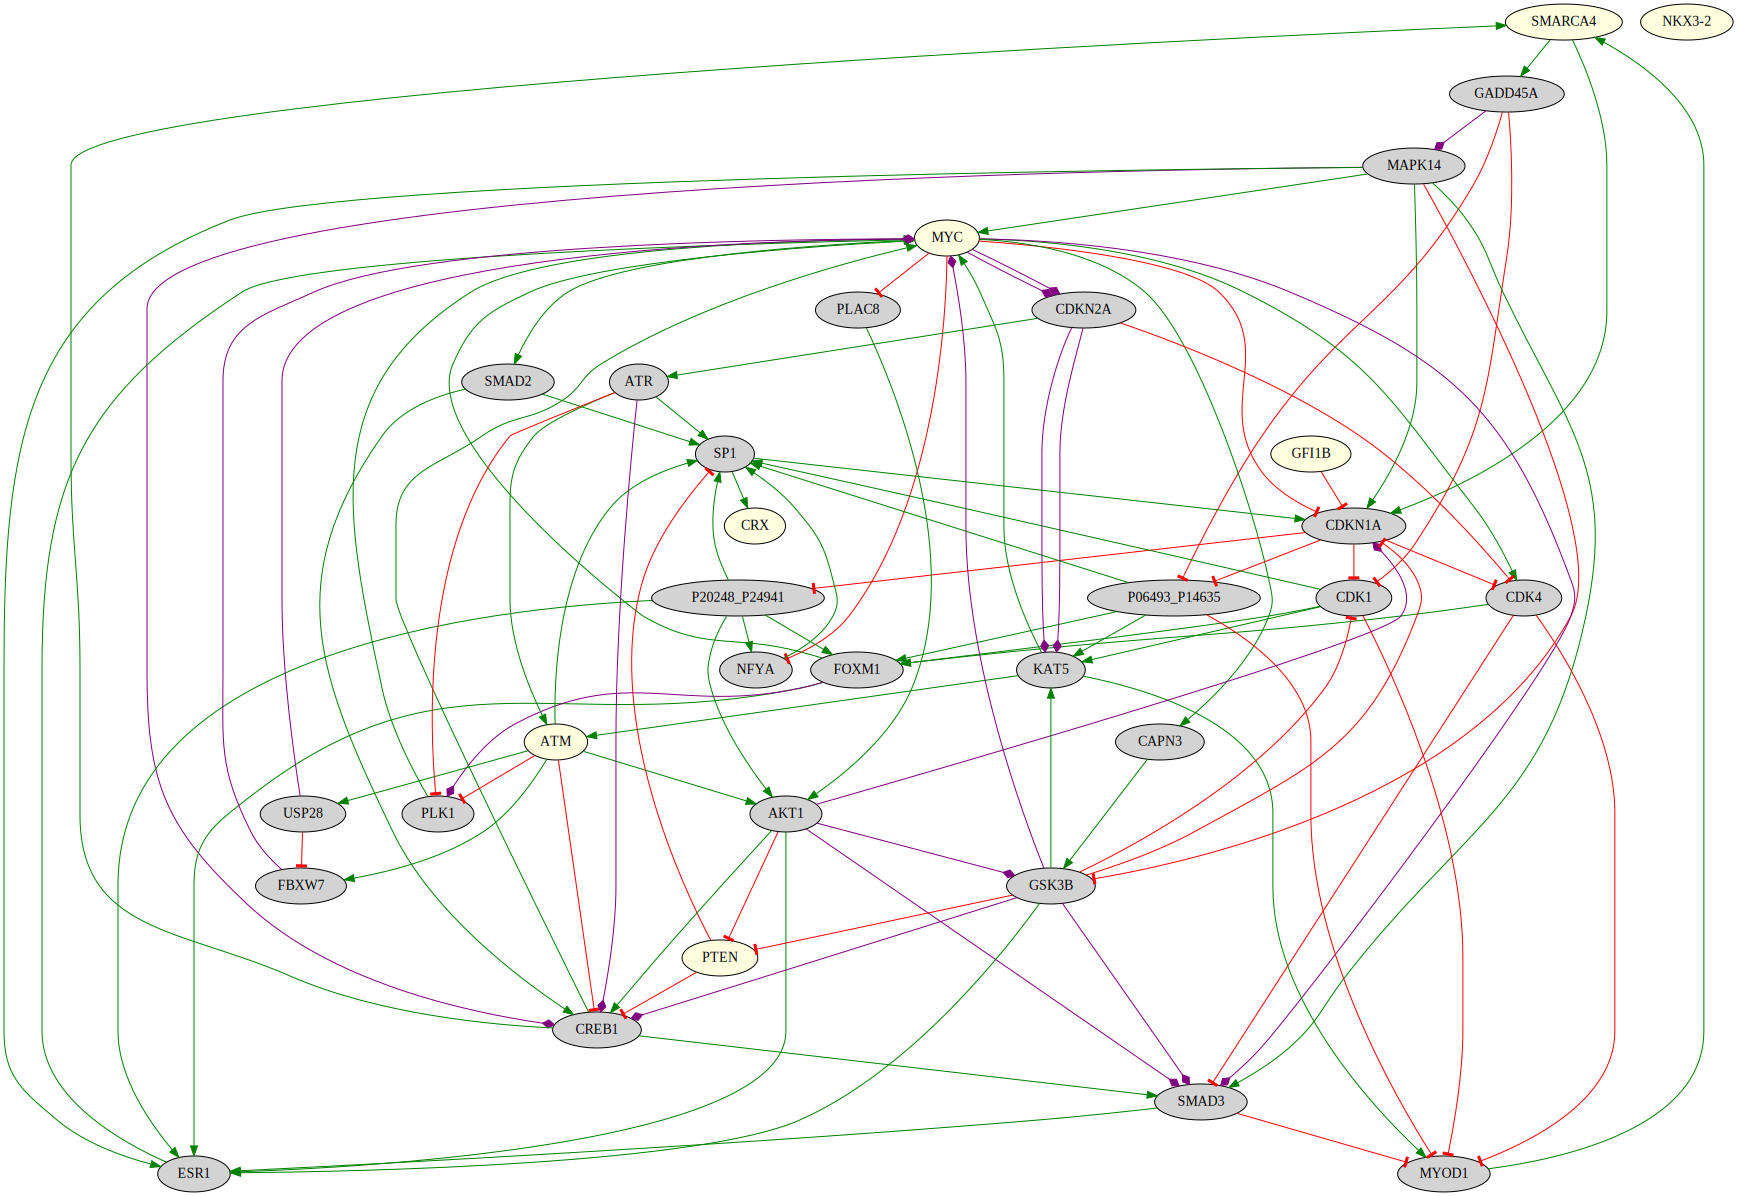

In [12]:
group3_visualizer = NetworkVisualizer(group3_net,color_by='effect', noi=True)
output = figures_folder + "Group3_omnipath_Northcott"
group3_visualizer.render(output_file=output)

# Exporting Network in sif file

In [13]:
from neko._outputs.exports import Exports

In [14]:
for node in group3_net.nodes["Uniprot"]:
    if group3_net.edges[group3_net.edges["source"].isin([node])].empty and group3_net.edges[group3_net.edges["target"].isin([node])].empty:
        print(group3_net.nodes[group3_net.nodes["Uniprot"] == node])
        group3_net.remove_node(node[0])

  Genesymbol Uniprot Type
6     NKX3-2  P78367  NaN


In [15]:
export = Exports(group3_net)

In [16]:
export.export_sif(sif_output + "Group3_omnipath_Northcott.sif")